# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#for visualising the data
import matplotlib.pyplot as plt
import seaborn as sns

#for splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split

#For scaling the predictors
from sklearn.preprocessing import MinMaxScaler

#for the regression bestr fit line
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing RFE for linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#to caluculate the r2 value
from sklearn.metrics import r2_score

In [2]:
#Loading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
#Checking the dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
# Checking if there are any null values in any of the columns of the cars dataset provided
#We can see that there are no null values present

cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Data Visualisation

In [7]:
#Copying the dataset into another dataset to preserve the original dataset as is further considerations
cars2 = cars.copy(deep= True)

In [8]:
cars2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


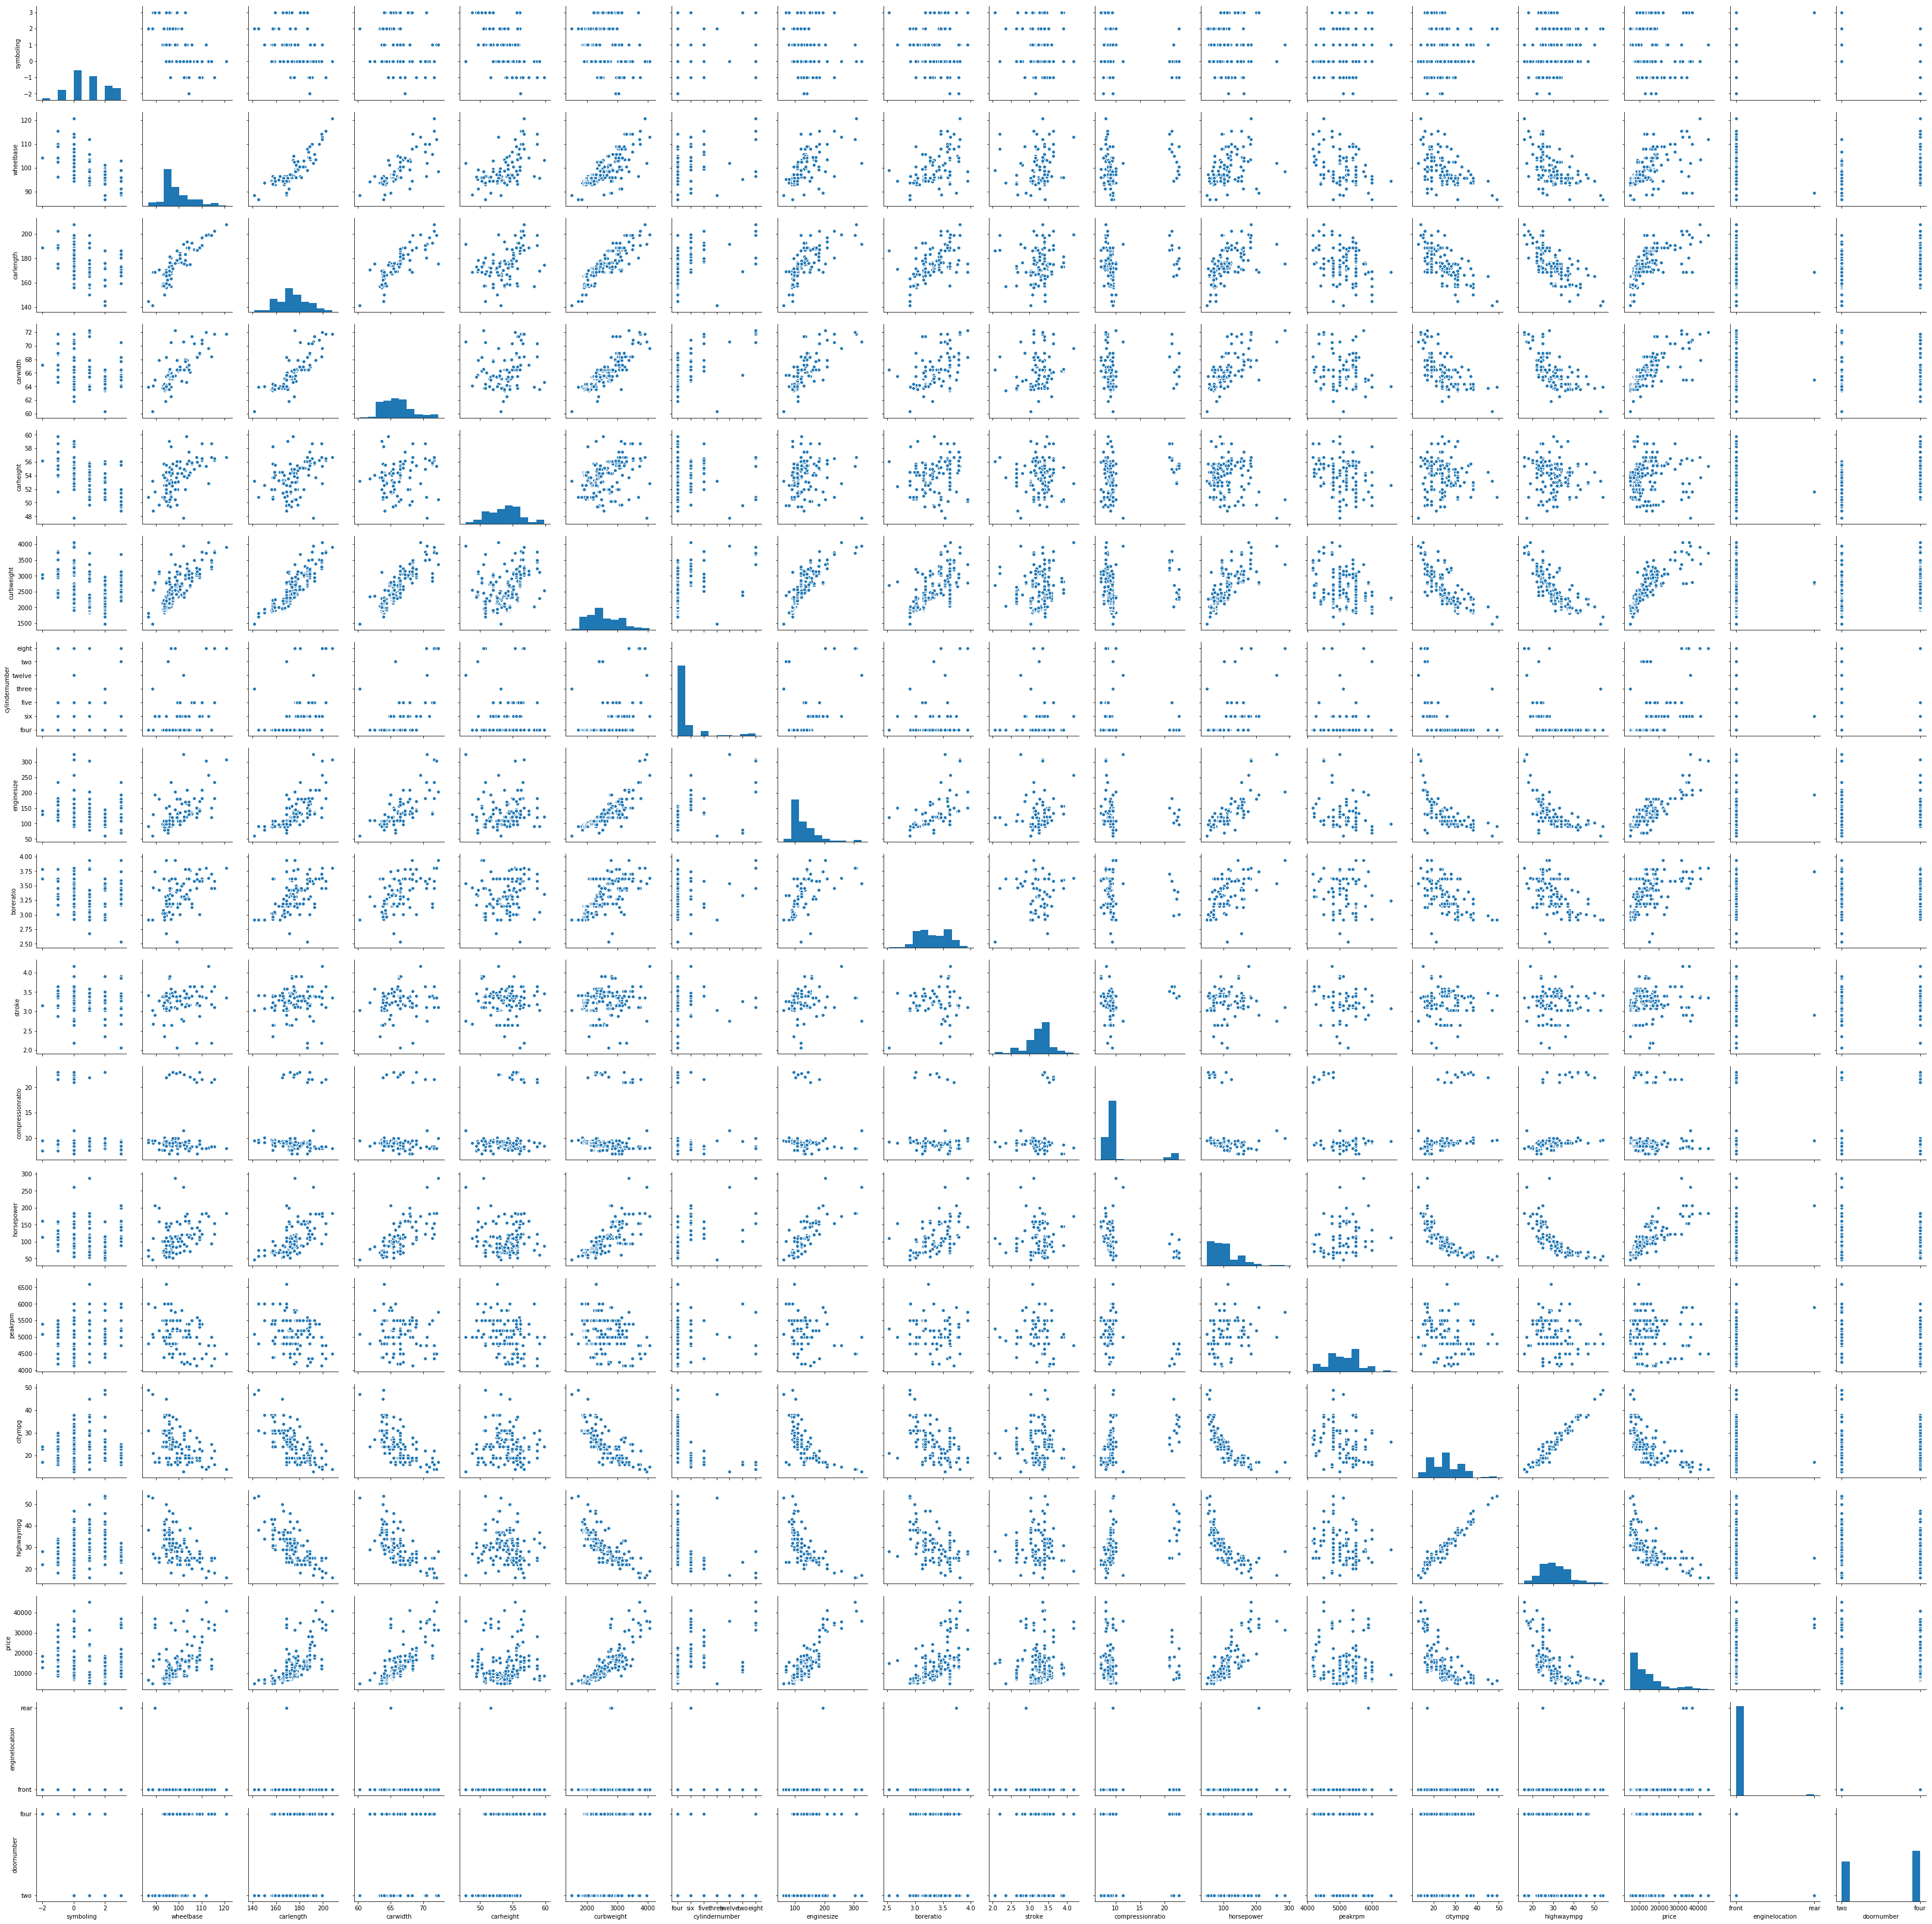

In [10]:
# pairplots to understand the correlation and linear relationship between the price and other variables
sns.pairplot(cars2, vars =['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
                          'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
                         'enginelocation', 'doornumber'])
plt.show()

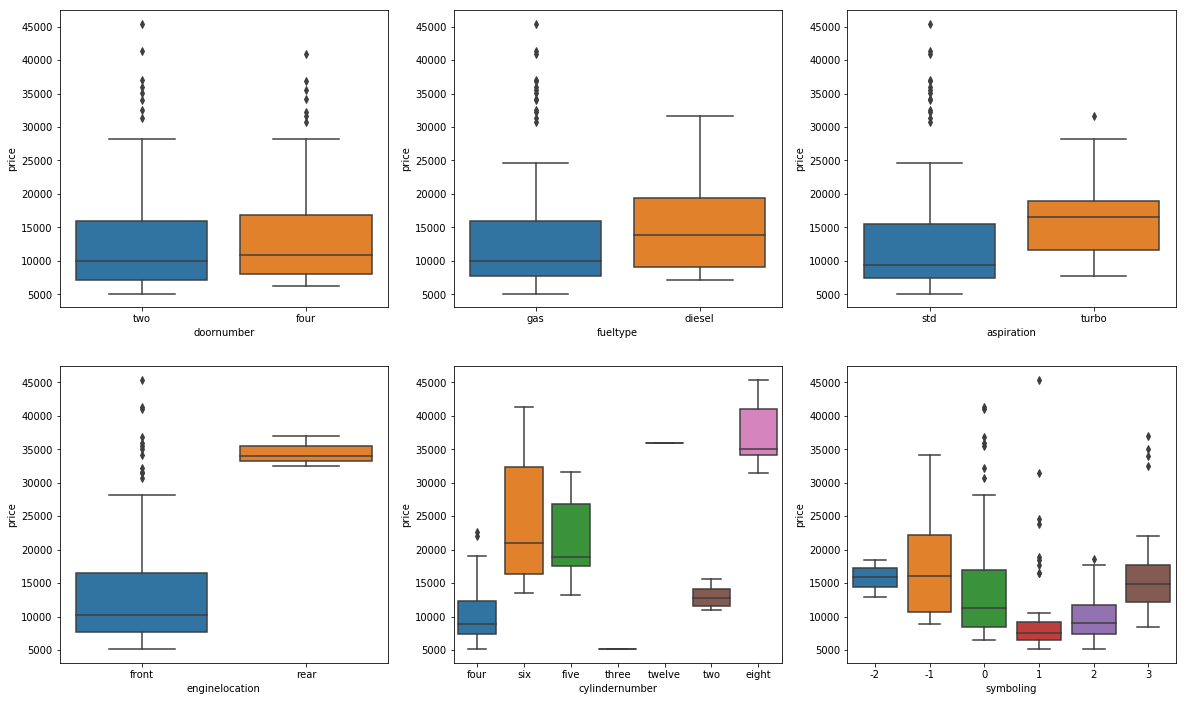

In [11]:
#Plotting the box plots to see if there can be inferences made from them to undersrtand relationships between variable and price
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = cars2)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cars2)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cars2)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars2)
plt.subplot(2,3,5)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars2)
plt.subplot(2,3,6)
sns.boxplot(x = 'symboling', y = 'price', data = cars2)
plt.show()

- average price of the cars with 2/4 doors in almost same
- Average cost of the fuel type is more than gas fuel type
- Aspirartion had a huge difference in the terms of the average price
- Engine location seems to play a major difference in the car prices
- We can see there is a somewhat a linear relationship between cylinder number and price
- Higher the absolute value of symboling higher the average price of the car

Text(0.5,1,'Correlation of the data for price and other features')

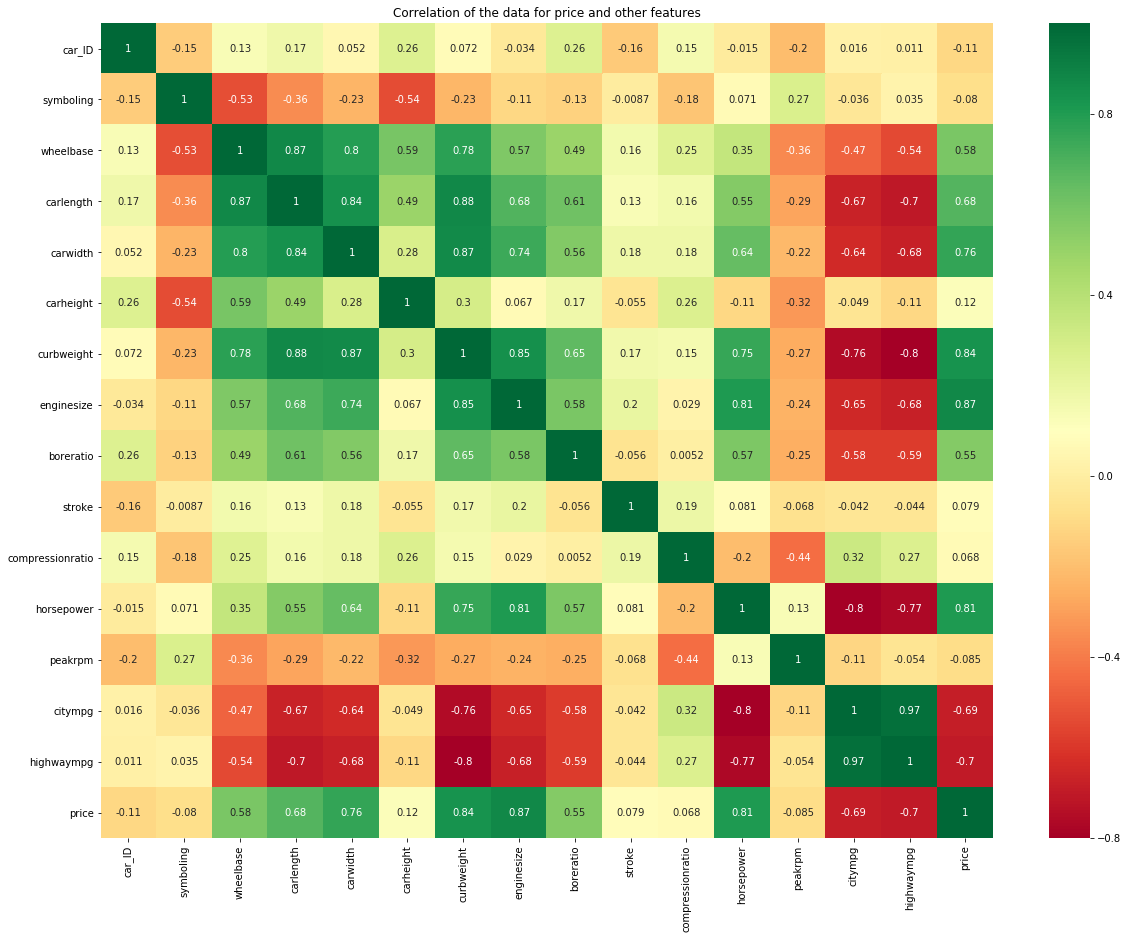

In [12]:
#plotting the Heat map which shows the correlation between all the numerical variables
corr = cars2.corr('pearson')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="RdYlGn", annot=True)
plt.title("Correlation of the data for price and other features")

- There is high correlation observed between price and following variable:
    - WheelBase, CarLength,CarWidth, CarHeight, EngineSize, Boreratio, horsepower, cycling, Highwaympg.
- Ther variable that are found to be highly correlated are:
    - Wheel Base - Symboling
    - carLength - WheelBase
    - Car Width - WheelBase
    - Car Width - CarLength
    - CarHeight - Symboling 
    - CarHEight - WheelBase
    - CurbWeight - WheelBase
    - CurbWeight - CarLength
    - CurbWeight - CarWidth
    - EngineSize - WheelBase etc..
    

## Data Preparation

In [13]:
cars2.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
#Dropping the car_ID column as this is just a key in the dataset
cars2.drop('car_ID',axis =1, inplace= True)

In [15]:
#Extracting the name of the company of the car and storing it into a new column, later dropping the original column
new = cars2["CarName"].str.split(" ", n = 1, expand = True)
cars2["car"]= new[0]
cars2.drop(columns =["CarName"], axis= 1, inplace = True)

In [16]:
#checking the occurance of the different brands and also to see if there are any spelling mistakes so that we can clean the data
cars2['car'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car, dtype: int64

In [17]:
# Here we can see that the toyota - toyouta, nissan - Nissan, mazda -maxda, porsche - porcshce, volkswagen - vokswagen
#are some spelling mistakes so correcting them with the respective correct names
cars2.loc[cars2['car'] == 'toyouta', ['car']] = 'toyota'
cars2.loc[cars2['car'] == 'Nissan', ['car']] = 'nissan'
cars2.loc[cars2['car'] == 'maxda', ['car']] = 'mazda'
cars2.loc[cars2['car'] == 'porcshce', ['car']] = 'porsche'
cars2.loc[cars2['car'] == 'vokswagen', ['car']] = 'volkswagen'

In [18]:
cars2['car'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
mercury         1
Name: car, dtype: int64

In [19]:
#since the Cylinder nymber is a defintive integer we can map the number(in words) to actual numeric and then we can use it for the pairploat also
cars2['cylindernumber'] = cars2['cylindernumber'].map({'four':4, 'six':6,'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})


In [20]:
#front = 0
#rear = 1
cars2['enginelocation'] = cars2['enginelocation'].map({'front':0, 'rear':1})

In [21]:
cars2['doornumber'] = cars2['doornumber'].map({'two':2, 'four':4})

In [22]:
#Using the get dimmies for the categorical columns which has more than 2 different categories 
car = pd.get_dummies(cars2['car'], drop_first = True)
cars2 = pd.concat([cars2, car], axis = 1)

In [23]:
cars2.drop(['car'], axis = 1, inplace = True)

In [24]:
#gas = 0
#diesel = 1
cars2['fueltype'] = cars2['fueltype'].map({'gas':0, 'diesel':1})

In [25]:
#std = 0
#turbo = 1
cars2['aspiration'] = cars2['aspiration'].map({'std':0, 'turbo':1})

In [26]:
body = pd.get_dummies(cars2['carbody'], drop_first = True)
cars2 = pd.concat([cars2, body], axis = 1)
cars2.drop(['carbody'], axis = 1, inplace = True)

In [27]:
driveWheel = pd.get_dummies(cars2['drivewheel'], drop_first = True)
cars2 = pd.concat([cars2, driveWheel], axis = 1)
cars2.drop(['drivewheel'], axis = 1, inplace = True)

In [28]:
engineType = pd.get_dummies(cars2['enginetype'], drop_first = True)
cars2 = pd.concat([cars2, engineType], axis = 1)
cars2.drop(['enginetype'], axis = 1, inplace = True)

In [29]:
fuelSystem = pd.get_dummies(cars2['fuelsystem'], drop_first = True)
cars2 = pd.concat([cars2, fuelSystem], axis = 1)
cars2.drop(['fuelsystem'], axis = 1, inplace = True)

In [30]:
#As we can see now all the categorical variables are now converted to numerical which can be used for the regression..
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               2

we can see there is visually linear kind of relationship between Price and (wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, horsepower, peakRpm)

In [31]:
#Checking the correlation matrix only as the Heat map is getting cluttred because of the more no of predictors after using the get dummies
corr = cars2.corr('pearson')


In [32]:
cars2.head(20)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,2,0,0,2,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110,5500,19,25,15250.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,1,0,0,4,0,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.40,8.5,110,5500,19,25,17710.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,1,0,0,4,0,105.8,192.7,71.4,55.7,2954,5,136,3.19,3.40,8.5,110,5500,19,25,18920.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,1,0,1,4,0,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.40,8.3,140,5500,17,20,23875.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,0,0,1,2,0,99.5,178.2,67.9,52.0,3053,5,131,3.13,3.40,7.0,160,5500,16,22,17859.167,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


##  Splitting the Data into Training and Testing Sets

In [33]:
#Splitting the data into Train and Test data sets with the ratio  of 0.7 and 0.3 respectively
np.random.seed(0)
cars2_train, cars2_test = train_test_split(cars2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
#checking the shape
cars2.shape

(205, 61)

In [35]:
#checking the shape after the split
cars2_train.shape

(143, 61)

In [36]:
#checking the shape after the split
cars2_test.shape

(62, 61)

In [37]:
#Creating the object for scaler
scaler = MinMaxScaler()

In [38]:
#Applying the scaler to the numeric columns except the dummy variables
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 
           'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',  'peakrpm', 'citympg', 'highwaympg', 'price']
cars2_train[num_vars] = scaler.fit_transform(cars2_train[num_vars])

In [39]:
cars2_train.head(10)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0,0,1.0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,0.0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,0.0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0.0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,1.0,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
190,1.0,0,0,0.0,0,0.272414,0.400000,0.308333,0.318584,0.284329,0.2,0.181132,0.404762,0.611111,0.09375,0.175000,0.551020,0.305556,0.324324,0.134321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
96,0.6,0,0,1.0,0,0.272414,0.393496,0.291667,0.592920,0.187355,0.2,0.135849,0.373016,0.555556,0.15000,0.087500,0.428571,0.500000,0.540541,0.065779,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
177,0.2,0,0,1.0,0,0.544828,0.560976,0.516667,0.539823,0.376261,0.2,0.230189,0.500000,0.681818,0.10625,0.183333,0.020408,0.388889,0.405405,0.169351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
181,0.2,0,0,1.0,0,0.617241,0.759350,0.516667,0.557522,0.645074,0.4,0.377358,0.468254,0.585859,0.13750,0.450000,0.428571,0.166667,0.189189,0.293726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
97,0.6,0,0,1.0,0,0.272414,0.473171,0.291667,0.504425,0.212956,0.2,0.135849,0.373016,0.555556,0.15000,0.087500,0.428571,0.500000,0.540541,0.079592,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [40]:
cars2_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.034965,0.041958,0.013986,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.184337,0.201198,0.117845,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479

In [41]:
#plt.figure(figsize = (30, 30))
#sns.heatmap(cars2_train.corr(), annot = True, cmap="YlGnBu")
#plt.show()
cars2_train.corr()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.272756,-1.023416e-01,-0.659214,0.155104,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.179149,-0.182393,-0.132768,-0.028788,-0.266962,0.038395,0.343449,-0.042737,0.022248,-0.129859,0.064332,-0.052187,-0.159266,0.024909,0.035610,-0.052546,-0.056975,-0.097917,0.135450,NaN,0.237388,0.056056,-0.162832,0.028865,0.188676,0.020266,0.188676,-1.050166e-01,-0.100556,0.000447,-0.374108,0.220127,0.188676,0.431934,-0.378439,-0.279121,0.122342,-0.072106,0.014279,-0.125030,-0.064765,-0.054312,-0.028385,0.313538,0.001721,0.270560,-0.272756,NaN,0.020993,0.211203,NaN
fueltype,-0.272756,1.000000,4.185461e-01,0.231626,-0.026537,0.393481,0.275886,0.293054,0.320231,0.288561,-0.005748,0.145095,0.153727,0.265493,0.983638,-0.100280,-0.486461,0.196355,0.142244,0.191150,-0.060193,-0.066178,0.337080,-0.046291,-0.066178,-0.081954,-0.046291,-0.046291,0.069231,NaN,-0.081954,-0.022324,0.346410,-0.053644,-0.046291,-0.037662,-0.046291,-9.128709e-02,-0.057382,0.072232,0.055149,-0.037662,-0.046291,-0.177060,0.185979,0.019545,-0.184655,0.227232,-0.026537,0.318709,0.004762,-0.095709,-0.081954,-0.053644,-0.231869,-0.046291,1.000000,NaN,-0.280624,-0.066178,NaN
aspiration,-0.102342,0.418546,1.000000e+00,0.089642,-0.039559,0.277414,0.234925,0.307027,0.111052,0.325634,-0.024279,0.115050,0.186639,0.199580,0.307006,0.222900,-0.152424,-0.206821,-0.252367,0.206540,0.107676,-0.098653,0.206380,-0.069007,0.082211,-0.122169,-0.069007,-0.069007,-0.149071,NaN,0.251126,-0.094287,0.279715,0.029988,-0.069007,-0.056143,0.057505,-2.832792e-18,-0.190089,0.008973,0.172642,-0.056143,-0.069007,-0.034730,0.059409,0.029136,-0.164489,0.110608,-0.039559,0.251126,-0.031944,-0.011890,-0.047510,-0.079968,-0.345651,-0.069007,0.418546,NaN,-0.016600,0.443937,NaN
doornumber,-0.659214,0.231626,8.964215e-02,1.000000,-0.094565,0.462232,0.436645,0.245854,0.554436,0.251023,0.006743,0.081539,0.183979,-0.014726,0.214898,-0.101487,-0.333523,-0.034440,-0.064721,0.075936,0.015551,-0.025056,0.092233,-0.066670,-0.095313,-0.118033,0.031617,0.031617,-0.062361,NaN,-0.118033,-0.086841,0.216025,0.065114,-0.164957,-0.014260,0.031617,1.504513e-01,0.032944,0.092233,0.185712,-0.134209,-0.164957,-0.605838,0.450106,0.347369,-0.044536,-0.028713,-0.094565,0.171980,-0.025029,0.116173,-0.060031,-0.191160,0.030365,-0.164957,0.231626,NaN,-0.006944,-0.165569,NaN
enginelocation,0.155104,-0.026537,-3.955939e-02,-0.094565,1.000000,-0.127454,-0.030193,-0.031943,-0.067534,0.033473,0.115932,0.141901,0.139578,-0.094329,-0.012263,0.221431,0.134722,-0.105445,-0.070935,0.226217,-0.015974,-0.017562,-0.015974,-0.012284,-0.017562,-0.021748,-0.012284,-0.012284,-0.026537,NaN,-0.021748,-0.027646,-0.020428,-0.014236,0.573270,-0.009995,-0.012284,-2.422508e-02,-0.033839,-0.015974,-0.017562,-0.009995,0.573270,-0.060588,-0.079906,-0.032849,-0.101590,0.114449,-0.007042,-0.021748,-0.123840,0.277269,-0.021748,-0.014236,-0.061532,-0.012284,-0.026537,NaN,0.094565,-0.017562,NaN
wheelbase,-0.539877,0.393481,2.774139e-01,0.462232,-0.127454,1.000000,0.877909,0.796888,0.555524,0.792815,0.353865,0.588600,0.482386,0.224970,0.341651,0.382758,-0.347757,-0.476317,-0.542295,0.622591,0.113322,0.172967,0.353620,-0.149230,-0.169896,-0.163380,-0.100771,0.266365,-0.110961,NaN,-0.142053,-0.157336,0.481538,-0.137718,-0.108163,-0.048575,0.014215,-1.013949e-01,-0.004621,0.020407,0.288038,-0.080651,-0.103235,-0.371606,0.333352,0.162160,-0.499023,0.538721,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN
carlength,-0.390880,0.275

In [42]:
#checking the contents for the mercury column
cars2_train['mercury'].value_counts()

0    143
Name: mercury, dtype: int64

### Dividing into X and Y sets for the model building

In [43]:
y_train = cars2_train.pop('price')
X_train = cars2_train

## Building a linear model

In [44]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [45]:
#Checking the coefficients
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

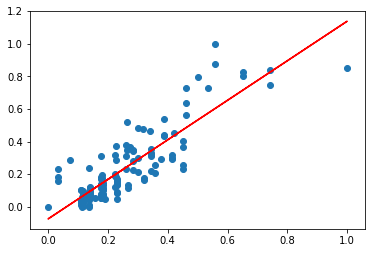

In [46]:
#Visualizing the regression line with the actual y_train
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072888 + 1.210676*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [47]:
#to understand the statistical summary of the model
#r2 is good, P(Fstat) is less, P values is less than 0.05
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.09e-44
Time:                        17:23:05   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

In [48]:
#adding curbweight as its is also hightly correlted to the price as seen in the heat map

X_train_lm = X_train[['enginesize', 'curbweight']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [50]:
#r2 is improved, P(Fstat) is less, P values is less than 0.05
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.31e-50
Time:                        17:24:50   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

In [51]:
#adding carwidth also as it also has high correlation
X_train_lm = X_train[['enginesize', 'curbweight', 'carwidth']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.162850
enginesize    0.679341
curbweight    0.273313
carwidth      0.231172
dtype: float64

In [52]:
#r2 is good, P(Fstat) is less, P values is less than 0.05
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.66e-50
Time:                        17:25:07   Log-Likelihood:                 136.26
No. Observations:                 143   AIC:                            -264.5
Df Residuals:                     139   BIC:                            -252.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1629      0.022     -7.450      0.0

IF we see the p value of all the variables are coming to be low. R2 values and Adjusted values are also decent enough , 
now we understand that these 3 predictors as significance in the prediction of the price of the car, Now lets get all of the variales
into the model and verify the results using the VIF,  r2 and p values



In [53]:
#trying out with all the columns present in the X_train
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const               1.168068e-01
symboling          -9.643979e-03
fueltype            1.538276e-01
aspiration          8.495175e-02
doornumber          8.524222e-03
enginelocation      2.130787e-01
wheelbase           2.187357e-01
carlength          -1.261351e-01
carwidth            2.595501e-01
carheight          -1.688134e-01
curbweight          2.771657e-01
cylindernumber     -5.376952e-01
enginesize          1.397706e+00
boreratio          -3.295752e-01
stroke             -1.520699e-01
compressionratio   -4.068851e-01
horsepower         -1.773806e-01
peakrpm             2.066034e-01
citympg             6.688245e-02
highwaympg          9.421062e-02
audi               -2.965337e-02
bmw                 2.169586e-01
buick               2.164098e-02
chevrolet          -1.276103e-01
dodge              -1.550929e-01
honda              -1.086093e-01
isuzu              -6.658653e-02
jaguar             -5.550508e-02
mazda              -3.608904e-02
mercury             7.088767e-17
          

In [54]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     53.39
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.24e-49
Time:                        17:25:50   Log-Likelihood:                 270.65
No. Observations:                 143   AIC:                            -429.3
Df Residuals:                      87   BIC:                            -263.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1168      0.136  

Looking at the summary results:
- r2 and Adjusted r2 values are good
- Probability of the F-stat is also less
- P values for most of the predictors are concerning as they are more than that of 0.05
- Now we can check the VIF Values so that we can statiscally backed decision in droppin the predictors form the model


In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,inf
50,ohcf,inf
55,idi,inf
4,enginelocation,inf
36,subaru,inf
11,enginesize,724.980000
14,compressionratio,376.960000
10,cylindernumber,354.020000
18,highwaympg,238.250000
17,citympg,235.370000


## Note:
Though the vars has bunch of columns , i have tried building the model with removal of each and every predictor one at a time. so please be informed that not all the predictors are deleted at once.

In [57]:
#removing the fueltype as it has very high p value and VIF is also greater than 5
vars = ['fueltype']
X = X_train.drop(vars , 1,)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     53.39
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.24e-49
Time:                        17:30:03   Log-Likelihood:                 270.65
No. Observations:                 143   AIC:                            -429.3
Df Residuals:                      87   BIC:                            -263.4
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1168      0.136  

In [58]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
49,ohcf,inf
3,enginelocation,inf
35,subaru,inf
10,enginesize,724.980000
13,compressionratio,376.960000
9,cylindernumber,354.020000
54,idi,277.200000
17,highwaympg,238.250000
16,citympg,235.370000
5,carlength,219.040000


In [59]:
#removing the symboling also, car height as it has very high p value and VIF is also greater than 5
vars = ['fueltype','symboling']
X = X_train.drop(vars , 1,)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     54.97
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.60e-50
Time:                        17:31:18   Log-Likelihood:                 270.60
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                      88   BIC:                            -268.3
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1068      0.129  

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginelocation,inf
48,ohcf,inf
34,subaru,inf
9,enginesize,715.930000
12,compressionratio,376.700000
8,cylindernumber,353.960000
53,idi,276.220000
16,highwaympg,238.090000
15,citympg,234.980000
4,carlength,218.840000


In [61]:
#Removing the high VIF attribute as removing the business important variable doesnt make a clear justification just because of high vif
vars = ['fueltype','symboling', 'carheight']
X = X_train.drop(vars , 1,)
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     50.92
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.04e-48
Time:                        17:34:19   Log-Likelihood:                 263.21
No. Observations:                 143   AIC:                            -418.4
Df Residuals:                      89   BIC:                            -258.4
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0096      0.129  

In [62]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginelocation,inf
47,ohcf,inf
33,subaru,inf
8,enginesize,696.900000
11,compressionratio,373.530000
7,cylindernumber,339.980000
52,idi,276.010000
15,highwaympg,235.680000
14,citympg,226.490000
4,carlength,214.690000


## Note:
Though the vars has bunch of columns , i have tried building the model with removal of each and every predictor one at a time. so please be informed that not all the predictors are deleted at once.

In [63]:
vars = ['symboling','carheight', 'mercury','fueltype','doornumber','carlength', 'cylindernumber', 'stroke', 'compressionratio', 'horsepower',
       'carwidth', 'citympg', 'highwaympg', 'audi', 'buick', 'isuzu', 'jaguar', 'chevrolet', 'honda', 'mazda', 'nissan',
        'renault', 'saab', 'subaru', 'toyota', 'plymouth', 'volkswagen', 'volvo', 'vw', 'fwd', 'rwd', 'dohcv', 'ohcv', 
        '2bbl', '4bbl', 'idi', 'dodge', 'mitsubishi', 'mpfi', 'spdi', 'spfi', 'mfi', 'ohc', 'ohcf', 'curbweight', 'wheelbase',
        'boreratio', 'peugeot' , 'peakrpm', 'l', 'enginelocation', 'hardtop', 'wagon', 'sedan']
X = X_train.drop(vars , 1,)

In [64]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     156.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.62e-58
Time:                        17:35:31   Log-Likelihood:                 164.78
No. Observations:                 143   AIC:                            -315.6
Df Residuals:                     136   BIC:                            -294.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0705      0.015     -4.805      0.0

- All the predictors are having the p values less than 0.05
- Adjusted r2 score is good relative to the R square and adj r2 score stands at 86.8%
- P(f-stat) is also very less


In [67]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.64
4,hatchback,1.34
0,aspiration,1.26
2,bmw,1.14
5,rotor,1.10
3,porsche,1.09


- All the predictors VIF values are less than 5 which states none of them holds high collinearity

## Residual Analysis of the train data

In [68]:
#Predicting the data with the model whihc we have built
y_train_price = lr_2.predict(X_train_lm)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Error')

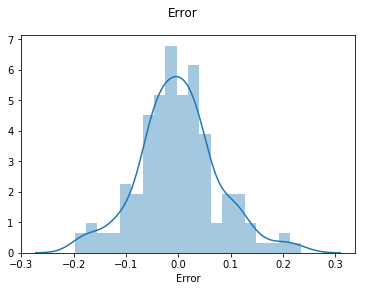

In [69]:
#visualising the errors to understand if they follow the assumption also
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle ('Error')
plt.xlabel ('Error')

We can see the residuls are normally distributed over 0.

## Making Predictions Using the Final Model


In [70]:
#applying the same scaler on the columns present in the test
num_vars = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 
           'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',  'peakrpm', 'citympg', 'highwaympg', 'price']
cars2_test[num_vars] = scaler.transform(cars2_test[num_vars])

In [71]:
cars2_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.564516,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.032258,0.032258,0.048387,0.0,0.048387,0.064516,0.016129,0.0,0.064516,0.016129,0.064516,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.0,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.178127,0.178127,0.216335,0.0,0.216335,0.247676,0.127000,0.0,0.247676,0.127000,0.247676,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.0,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [72]:
#Dividing the test data set into X_test and y_test
y_test = cars2_test.pop('price')
X_test = cars2_test

In [73]:
#adding the constant variable
X_test_lm2 = sm.add_constant(X_test)

In [74]:
vars = ['symboling','carheight', 'mercury','fueltype','doornumber','carlength', 'cylindernumber', 'stroke', 'compressionratio', 'horsepower',
       'carwidth', 'citympg', 'highwaympg', 'audi', 'buick', 'isuzu', 'jaguar', 'chevrolet', 'honda', 'mazda', 'nissan',
        'renault', 'saab', 'subaru', 'toyota', 'plymouth', 'volkswagen', 'volvo', 'vw', 'fwd', 'rwd', 'dohcv', 'ohcv', 
        '2bbl', '4bbl', 'idi', 'dodge', 'mitsubishi', 'mpfi', 'spdi', 'spfi', 'mfi', 'ohc', 'ohcf', 'curbweight', 'wheelbase',
        'boreratio', 'peugeot' , 'peakrpm', 'l', 'enginelocation', 'hardtop', 'wagon', 'sedan']
X_test_lm2 = X_test_lm2.drop(vars, 1)

In [75]:
#Predicting the values on the test dataset
y_pred_lm2 = lr_2.predict(X_test_lm2)

Text(0,0.5,'y_pred')

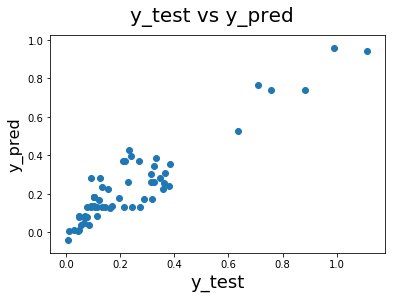

In [78]:
#Plotting the Y predicted
fig = plt.figure()
plt.scatter(y_test, y_pred_lm2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [79]:
#r2 score for the test data set using the model built, it has to be +/- 5 % from the trian dataset's r2 score
r2_score(y_test, y_pred_lm2)

0.8641276757951465

If we observe the adjusted r2 score is 0.868 on the training set and the r2 score on the y_test is 0.864 which is nearer and this means the model we have is able to explain the 86.4 % of the variance test data also. This is a decent r2 score 

## Using RFE 
Let us see if we can use RFE to remove any unnecassary predictor varaibles or if the r2 score of the RFE based model has any better values we can incorporate based on statiscal significance

In [80]:
#dividing the dataset into train and test
np.random.seed(0)
cars2_train_rfe, cars2_test_rfe = train_test_split(cars2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [81]:
#Creating the X and y datasets which will be used in the model for RFE
y_train = cars2_train_rfe.pop('price')
X_train = cars2_train_rfe

In [82]:
#Runnig RFE for the number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 6)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 43),
 ('fueltype', False, 23),
 ('aspiration', False, 34),
 ('doornumber', False, 50),
 ('enginelocation', True, 1),
 ('wheelbase', False, 42),
 ('carlength', False, 45),
 ('carwidth', False, 14),
 ('carheight', False, 36),
 ('curbweight', False, 51),
 ('cylindernumber', False, 30),
 ('enginesize', False, 40),
 ('boreratio', False, 37),
 ('stroke', False, 39),
 ('compressionratio', False, 26),
 ('horsepower', False, 48),
 ('peakrpm', False, 52),
 ('citympg', False, 49),
 ('highwaympg', False, 47),
 ('audi', False, 25),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 33),
 ('dodge', False, 27),
 ('honda', False, 44),
 ('isuzu', False, 31),
 ('jaguar', True, 1),
 ('mazda', False, 17),
 ('mercury', False, 53),
 ('mitsubishi', False, 16),
 ('nissan', False, 29),
 ('peugeot', False, 3),
 ('plymouth', False, 28),
 ('porsche', True, 1),
 ('renault', False, 13),
 ('saab', True, 1),
 ('subaru', False, 6),
 ('toyota', False, 19),
 ('volkswagen', False, 18),
 (

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'bmw', 'buick', 'jaguar', 'porsche', 'saab'], dtype='object')

In [85]:
#Building model using the RFE to see the r2 score of the RFE model
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     42.77
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.15e-29
Time:                        17:42:32   Log-Likelihood:                -1408.3
No. Observations:                 143   AIC:                             2831.
Df Residuals:                     136   BIC:                             2851.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.068e+04    423.349     25.

In [86]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginelocation,1.49
5,porsche,1.49
0,const,1.16
2,bmw,1.00
3,buick,1.00
4,jaguar,1.00
6,saab,1.00


As we can see that the r2 score for the RFE based model is less that of the model build using the stats model with
self discretion and stataistcal significance. we are proceeding with the values of the coefficients and constant obtained
in the SM model. Hence not need ofr seeing the test prediction r2 score as it wont be more than that of the 63.8 +/- 5 %

Finally the equation of the Regression line would be:

  Price  = -0.0705 + 0.09*aspiration + 1.104*enginesize + 0.2189*bmw + 0.2579*porsche -0.0456*hatchback + 0.2865*rotor



## Inferences:
- The statistically significant predictors on which the Price of a car is based on is: Aspiration, EngineSize, Car company, carbody, EngineType
- Geely Auto should be more focusing on their competitiors especially BMX, Prosche as they are the main competitors who are final predictors in the Regression hyperplane
